In [52]:
import pandas as pd
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import pickle
import cv2
import tensorflow as tf
import functools

# Load Data

In [2]:
df= pd.read_csv("data/data.csv")

In [3]:
df.head()

,unix Timestamp,ACC X,Light
0,1.680900e+12,1.077344,3
1,1.680900e+12,0.864270,3
2,1.680900e+12,0.981580,3
3,1.680900e+12,0.553037,3
4,1.680900e+12,0.600919,3


In [4]:
df.tail()

,unix Timestamp,ACC X,Light
137495,1.680900e+12,1.735722,1
137496,1.680900e+12,1.647140,1
137497,1.680900e+12,1.647140,1
137498,1.680900e+12,1.537011,1
137499,1.680900e+12,1.319148,1


In [5]:
df.shape

(137500, 3)

In [6]:
df.columns

Index(['unix Timestamp', 'ACC X', 'Light'], dtype='object')

## frequency of sampling

In [7]:
time_data_df=df[['unix Timestamp']]

In [8]:
time_data_df.head()

,unix Timestamp
0,1.680900e+12
1,1.680900e+12
2,1.680900e+12
3,1.680900e+12
4,1.680900e+12


In [9]:
time_data_df.tail()

,unix Timestamp
137495,1.680900e+12
137496,1.680900e+12
137497,1.680900e+12
137498,1.680900e+12
137499,1.680900e+12


In [10]:
print(time_data_df['unix Timestamp'].iloc[0],time_data_df['unix Timestamp'].iloc[-1])

1680900000000.0 1680900000000.0


### same time across all rows cant calculate frequency; taking frequency to be 460 Hz.

In [12]:
labels = pd.read_csv("data/label.csv")

In [13]:
labels.head()

,labels
0,1
1,1
2,1
3,2
4,2


In [14]:
labels['labels'].value_counts()

labels
2    24
1    20
3    11
Name: count, dtype: int64

In [15]:
labels.shape

(55, 1)

In [16]:
zero_indexed_labels=[x-1 for x in labels['labels']]

In [17]:
data = df[['ACC X']]  
data = data.values.reshape(-1, 2500) 
labels = zero_indexed_labels

In [18]:
type(data)

numpy.ndarray

In [19]:
data.shape

(55, 2500)

#  Conversion to spectrograms

In [20]:
f, t, Sxx = spectrogram(data[0, :], fs=460)

In [21]:
Sxx.shape

(129, 11)

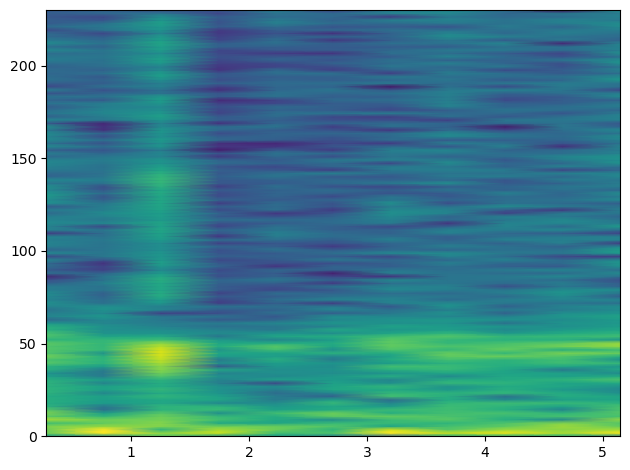

In [22]:
plt.plot(5,5)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.tight_layout()
plt.show()

In [30]:
def generate_spectrogram_and_store(data,labels,output_folder,sampling_rate=460):
    
    random_state = np.random.RandomState(seed=42)
    train_indices = random_state.randint(0, 55, size=44)
    train_data=[]
    val_data=[]
    full_data=[]
    
    
    for sample_idx in range(data.shape[0]):
        sample = data[sample_idx, :]
        
        f, t, Sxx = spectrogram(sample, fs=460)

        plt.plot(5,5)
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        plt.tight_layout()

        output_file = output_folder + '/image_'+str(sample_idx)+'.jpg'

        # Save the spectrogram image
        plt.savefig(output_file)
        plt.close() 
        
        full_data.append((cv2.imread(output_file),labels[sample_idx]))
        if(sample_idx in train_indices):
            train_data.append((cv2.imread(output_file),labels[sample_idx]))
        else:
            val_data.append((cv2.imread(output_file),labels[sample_idx]))
    with open(output_folder+'/entire_data.pickle','wb') as f:
        pickle.dump(full_data,f)  
    with open(output_folder+'/train_data.pickle','wb') as f:
        pickle.dump(train_data,f)
    with open(output_folder+'/val_data.pickle','wb') as f:
        pickle.dump(val_data,f)   

In [31]:
generate_spectrogram_and_store(data,labels,'../spectrograms')

In [46]:
with open('../spectrograms/full_data_list_batch_wise.pickle','wb')as f:
    pickle.dump(full_data_list_batch_wise,f)